In [111]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# For handling warnings
import warnings
warnings.filterwarnings('ignore')

In [112]:
# Load the dataset with a different encoding
df = pd.read_csv('Instagram_data.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [113]:
# Get the shape of the dataset
df_shape = df.shape

# Print the shape
print(f'The dataset has {df_shape[0]} rows and {df_shape[1]} columns.')


The dataset has 119 rows and 13 columns.


In [114]:
# Get the column names
columns = df.columns

# Print the column names
print("Columns in the dataset:")
print(columns)

Columns in the dataset:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


In [115]:
# Check for null values in the dataset
null_values = df.isnull().sum()

# Print the number of null values for each column
print("Number of null values in each column:")
print(null_values)


Number of null values in each column:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


## Feature Engineering

In [116]:
# Calculate Engagement Rate
df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']*100
# Calculate Conversion Rate (using Impressions)
df['Conversion Rate'] = df['Follows'] / df['Impressions']*100
# Calculate Conversion Rate (using Profile Visits)
df['Conversion Rate (Visits)'] = df['Follows'] / df['Profile Visits']*100
# Calculate Save Rate
df['Save Rate'] = df['Saves'] / df['Impressions']*100
# Calculate Reach from Hashtags Percentage
df['Hashtags Reach %'] = df['From Hashtags'] / df['Impressions'] * 100

In [117]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement Rate,Conversion Rate,Conversion Rate (Visits),Save Rate,Hashtags Reach %
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,4.49,0.05,5.71,2.50,26.22
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,4.54,0.19,20.83,3.60,34.07
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,3.56,0.30,19.35,1.02,29.54
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,5.08,0.18,34.78,3.80,13.71
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,5.24,0.00,0.00,3.81,10.13


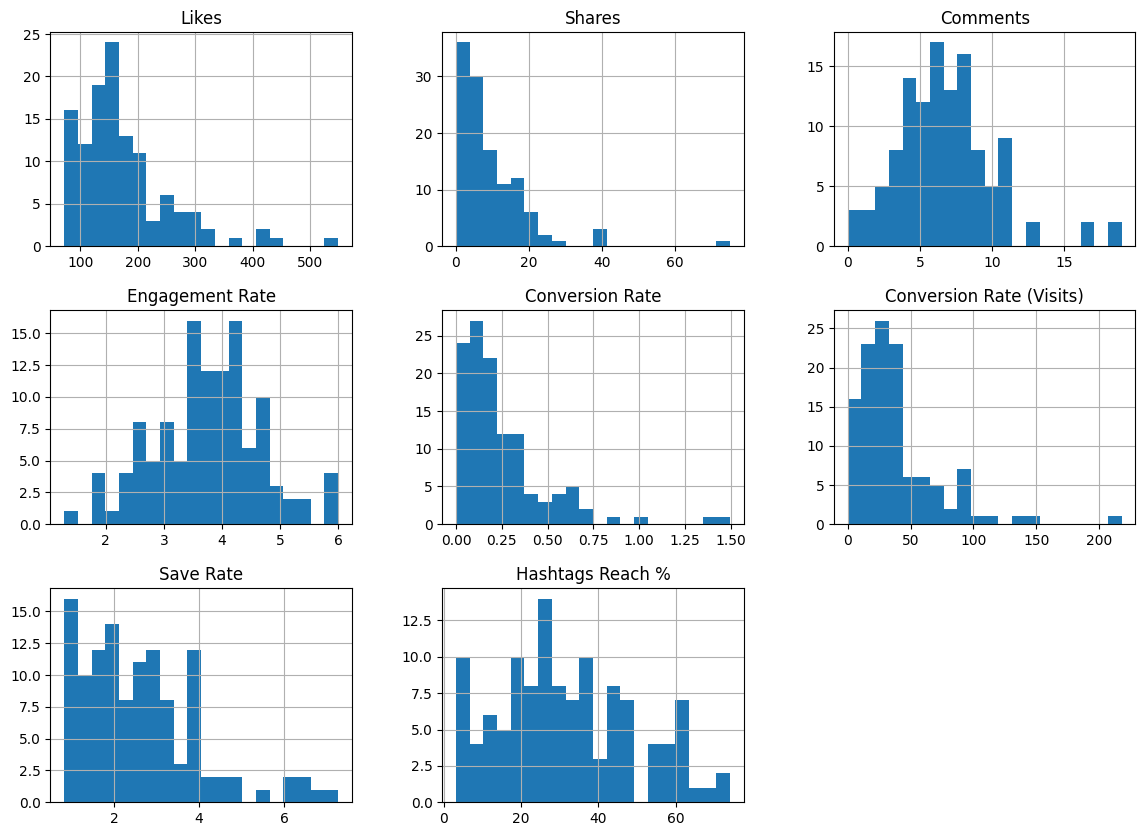

In [118]:
# Plot histograms for the selected columns
df[['Likes', 'Shares', 'Comments', 'Engagement Rate', 
    'Conversion Rate', 'Conversion Rate (Visits)', 
    'Save Rate', 'Hashtags Reach %']].hist(bins=20, figsize=(14, 10))

plt.show()


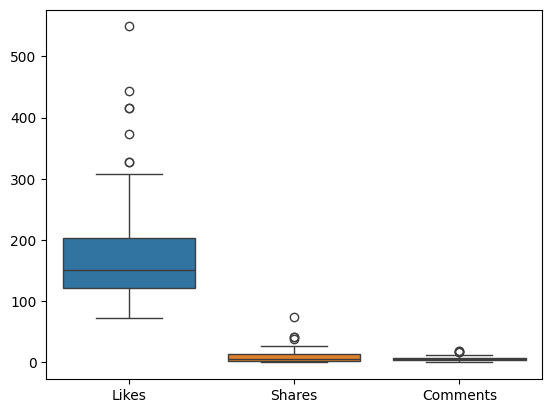

In [119]:
# Spread of data
sns.boxplot(data=df[['Likes', 'Shares', 'Comments']])
plt.show()

In [120]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Engagement Rate'].quantile(0.25)
Q3 = df['Engagement Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Filter out the outliers
df = df[(df['Engagement Rate'] >= lower_bound) & (df['Engagement Rate'] <= upper_bound)]

# Check the shape of the original and filtered DataFrames
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df.shape}")

# Optionally, you can reset the index of the filtered DataFrame
df.reset_index(drop=True, inplace=True)

Lower bound for outliers: 1.4959950482854665
Upper bound for outliers: 5.896458172727234
Original DataFrame shape: (116, 18)
Filtered DataFrame shape: (116, 18)


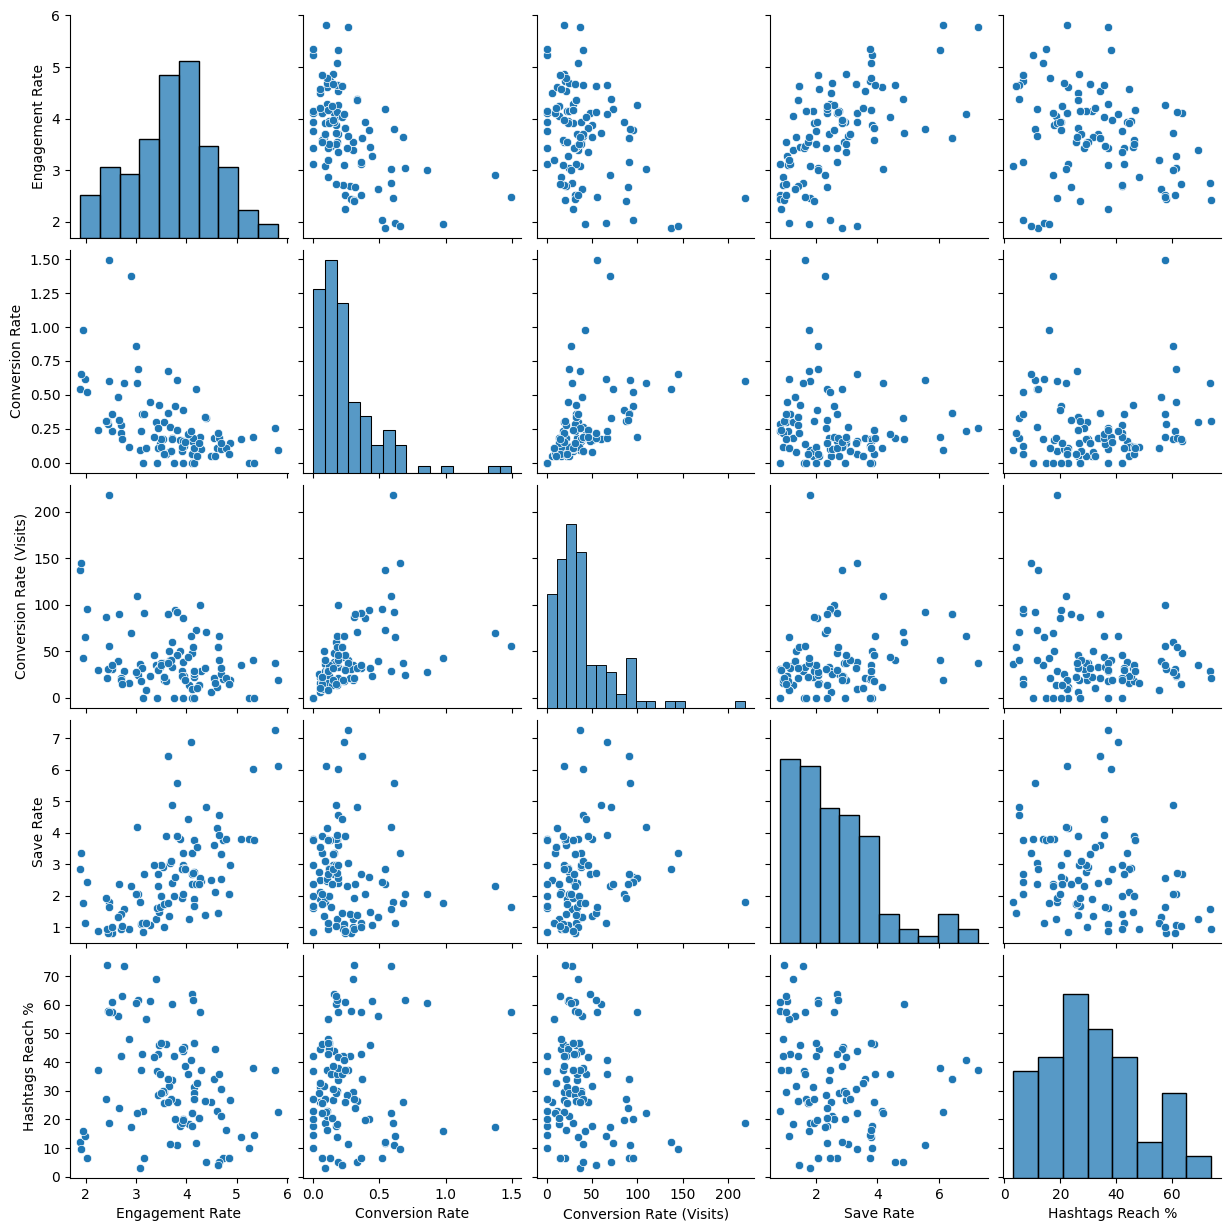

In [121]:
# Pairwise scatter plots
sns.pairplot(df[['Engagement Rate', 'Conversion Rate', 'Conversion Rate (Visits)','Save Rate', 'Hashtags Reach %']])
plt.show()

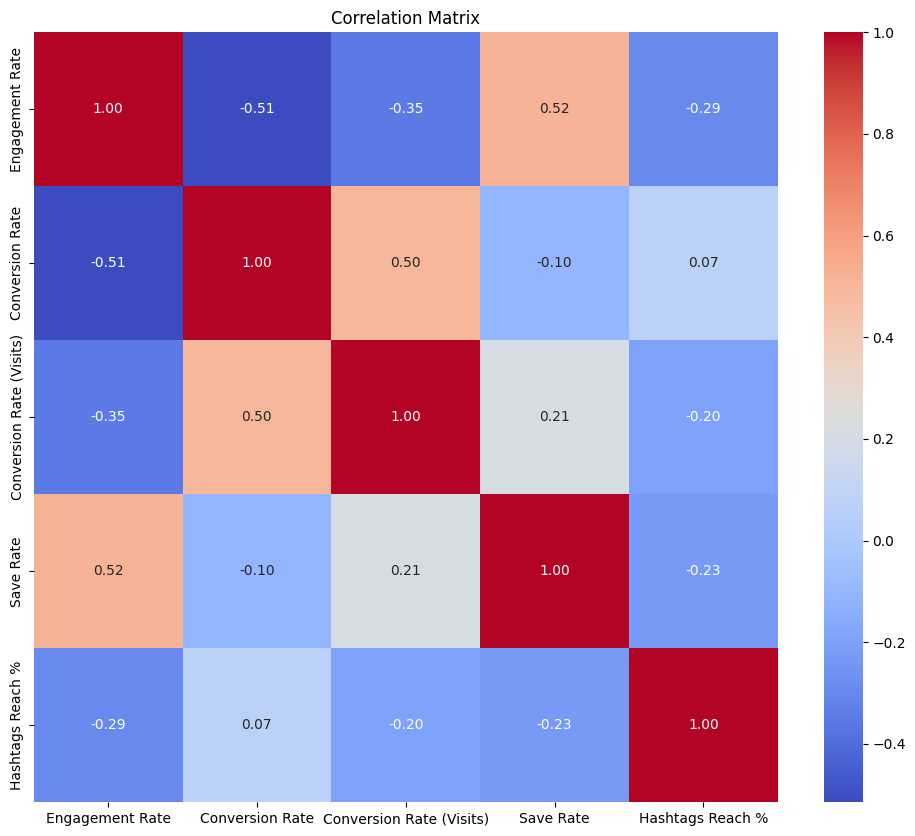

In [122]:
# correlation matrix
selected_columns = ['Engagement Rate', 'Conversion Rate', 'Conversion Rate (Visits)', 'Save Rate', 'Hashtags Reach %']
subset_df = df[selected_columns]
corr_matrix = subset_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [123]:
# Define thresholds for categorizing engagement rates
def categorize_engagement_rate(rate):
    if rate >= 4.0:
        return 'High'
    elif rate >= 2.0:
        return 'Moderate'
    else:
        return 'Low'

# Apply the categorization function to the 'Engagement Rate' column
df['Engagement Rate Label'] = df['Engagement Rate'].apply(categorize_engagement_rate)

# Check the new column
print(df[['Engagement Rate', 'Engagement Rate Label']].head())

   Engagement Rate Engagement Rate Label
0             4.49                  High
1             4.54                  High
2             3.56              Moderate
3             5.08                  High
4             5.24                  High


In [124]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement Rate', 'Conversion Rate',
       'Conversion Rate (Visits)', 'Save Rate', 'Hashtags Reach %',
       'Engagement Rate Label'],
      dtype='object')

## Text Preprocessing

In [125]:
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nitya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
# Define text preprocessing functions
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stop words
    return text

# Apply preprocessing to 'Caption' and 'Hashtags'
df['Cleaned Caption'] = df['Caption'].apply(preprocess_text)
df['Cleaned Hashtags'] = df['Hashtags'].apply(preprocess_text)

# Vectorization with CountVectorizer
count_vectorizer_caption = CountVectorizer()
X_caption = count_vectorizer_caption.fit_transform(df['Cleaned Caption'])

count_vectorizer_hashtags = CountVectorizer()
X_hashtags = count_vectorizer_hashtags.fit_transform(df['Cleaned Hashtags'])

# Vectorization with TF-IDF
tfidf_vectorizer_caption = TfidfVectorizer()
X_caption_tfidf = tfidf_vectorizer_caption.fit_transform(df['Cleaned Caption'])

tfidf_vectorizer_hashtags = TfidfVectorizer()
X_hashtags_tfidf = tfidf_vectorizer_hashtags.fit_transform(df['Cleaned Hashtags'])

In [127]:
print("Feature names for Captions (BoW):", count_vectorizer_caption.get_feature_names_out())
print("Shape of Captions BoW matrix:", X_caption.shape)

Feature names for Captions (BoW): ['100' '170' '2022' '280' '6digit' '90' 'account' 'accuracy' 'activated'
 'activation' 'alexnet' 'algorithm' 'algorithms' 'also' 'amazon' 'among'
 'amount' 'analysis' 'analyst' 'analystscientist' 'analyze' 'analyzing'
 'annotate' 'annotations' 'anxiety' 'applications' 'articles' 'artificial'
 'asking' 'audio' 'automatic' 'backend' 'based' 'become' 'beginner'
 'beginners' 'beginning' 'best' 'biases' 'bio' 'bitcoin' 'books' 'box'
 'boxplot' 'build' 'builtin' 'business' 'calculate' 'calculating'
 'calculations' 'candlestick' 'capital' 'case' 'cases' 'categories'
 'causes' 'certifications' 'channels' 'characteristics' 'charaterized'
 'chart' 'chat' 'check' 'choose' 'classify' 'clustering' 'code' 'coding'
 'collect' 'collected' 'collecting' 'come' 'commonly' 'companies'
 'company' 'compared' 'complete' 'complex' 'computational' 'connects'
 'considered' 'content' 'controlled' 'convolutional' 'correlation' 'count'
 'countries' 'covariance' 'covid19' 'create' 

In [128]:
print("Feature names for Hashtags (BoW):", count_vectorizer_hashtags.get_feature_names_out())
print("Shape of Hashtags BoW matrix:", X_hashtags.shape)

Feature names for Hashtags (BoW): ['ai' 'alexnet' 'algorithm' 'algorithms' 'amankharwal' 'amazonfinds'
 'analysis' 'analytics' 'artificialintelligence'
 'artificialintelligenceai' 'bigdata' 'bigdataanalytics' 'bitcoin'
 'bookstagram' 'boxplots' 'business' 'businessanalytics'
 'businessintelligence' 'businessmodel' 'candlestick' 'candlestickcharts'
 'casestudies' 'casestudy' 'cloud' 'clustering' 'code' 'coder'
 'codergallery' 'coding' 'codinginterview' 'codinglife' 'computerscience'
 'covid' 'cryptocurrency' 'css' 'cybersecurity' 'data' 'dataanalysis'
 'dataanalysisprojects' 'dataanalyst' 'dataanalytics' 'database'
 'datamining' 'datascience' 'datasciencecourse' 'datascienceeducation'
 'datascienceinterview' 'datasciencejobs' 'datascienceprojects'
 'datasciencetraining' 'datascientist' 'datavisualization' 'dataviz'
 'deeplearning' 'developer' 'facebook' 'finance' 'flipkart' 'forex'
 'google' 'hacking' 'health' 'healthcare' 'html' 'innovation' 'instagram'
 'instagramreach' 'internet' 'in

In [129]:
print("Feature names for Captions (TF-IDF):", tfidf_vectorizer_caption.get_feature_names_out())
print("Shape of Captions TF-IDF matrix:", X_caption_tfidf.shape)

Feature names for Captions (TF-IDF): ['100' '170' '2022' '280' '6digit' '90' 'account' 'accuracy' 'activated'
 'activation' 'alexnet' 'algorithm' 'algorithms' 'also' 'amazon' 'among'
 'amount' 'analysis' 'analyst' 'analystscientist' 'analyze' 'analyzing'
 'annotate' 'annotations' 'anxiety' 'applications' 'articles' 'artificial'
 'asking' 'audio' 'automatic' 'backend' 'based' 'become' 'beginner'
 'beginners' 'beginning' 'best' 'biases' 'bio' 'bitcoin' 'books' 'box'
 'boxplot' 'build' 'builtin' 'business' 'calculate' 'calculating'
 'calculations' 'candlestick' 'capital' 'case' 'cases' 'categories'
 'causes' 'certifications' 'channels' 'characteristics' 'charaterized'
 'chart' 'chat' 'check' 'choose' 'classify' 'clustering' 'code' 'coding'
 'collect' 'collected' 'collecting' 'come' 'commonly' 'companies'
 'company' 'compared' 'complete' 'complex' 'computational' 'connects'
 'considered' 'content' 'controlled' 'convolutional' 'correlation' 'count'
 'countries' 'covariance' 'covid19' 'creat

In [130]:
print("Feature names for Hashtags (TF-IDF):", tfidf_vectorizer_hashtags.get_feature_names_out())
print("Shape of Hashtags TF-IDF matrix:", X_hashtags_tfidf.shape)

Feature names for Hashtags (TF-IDF): ['ai' 'alexnet' 'algorithm' 'algorithms' 'amankharwal' 'amazonfinds'
 'analysis' 'analytics' 'artificialintelligence'
 'artificialintelligenceai' 'bigdata' 'bigdataanalytics' 'bitcoin'
 'bookstagram' 'boxplots' 'business' 'businessanalytics'
 'businessintelligence' 'businessmodel' 'candlestick' 'candlestickcharts'
 'casestudies' 'casestudy' 'cloud' 'clustering' 'code' 'coder'
 'codergallery' 'coding' 'codinginterview' 'codinglife' 'computerscience'
 'covid' 'cryptocurrency' 'css' 'cybersecurity' 'data' 'dataanalysis'
 'dataanalysisprojects' 'dataanalyst' 'dataanalytics' 'database'
 'datamining' 'datascience' 'datasciencecourse' 'datascienceeducation'
 'datascienceinterview' 'datasciencejobs' 'datascienceprojects'
 'datasciencetraining' 'datascientist' 'datavisualization' 'dataviz'
 'deeplearning' 'developer' 'facebook' 'finance' 'flipkart' 'forex'
 'google' 'hacking' 'health' 'healthcare' 'html' 'innovation' 'instagram'
 'instagramreach' 'internet' 

In [133]:
from scipy.sparse import hstack

# Combine the TF-IDF vectors
X_combined_tfidf = hstack([X_caption_tfidf, X_hashtags_tfidf])

In [134]:
from sklearn.model_selection import train_test_split

# Target variable
y = df['Engagement Rate Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6521739130434783
              precision    recall  f1-score   support

        High       0.75      0.33      0.46         9
         Low       0.00      0.00      0.00         1
    Moderate       0.63      0.92      0.75        13

    accuracy                           0.65        23
   macro avg       0.46      0.42      0.40        23
weighted avg       0.65      0.65      0.60        23



**Analysis:**
- The model demonstrates good performance in predicting "High" and "Moderate" engagement categories, with relatively high precision and recall for these classes.
- However, the model struggles with the "Low" engagement category, achieving zero precision and recall. This indicates that the model is not effectively identifying low engagement posts.
- The macro average scores reveal variability in performance across different engagement levels, with moderate overall performance.
- To enhance the model's ability to classify "Low" engagement posts and achieve a more balanced performance, further improvement is needed.

**Next Steps:**
1. **Hyperparameter Tuning:** Optimize model hyperparameters to improve performance metrics and achieve better classification results.

The project results indicate that while the model performs well for high and moderate engagement, significant work is needed to improve predictions for low engagement and achieve a more balanced classification performance.


## Random Forest Classifier and Hyperparameter Tuning

 **Hyperparameter Tuning with Random Forest:**
   - **Model Selection:** We use the Random Forest Classifier, which is an ensemble method known for its robustness and ability to handle both numerical and categorical data effectively.
   - **Parameter Grid Definition:** We define a grid of hyperparameters to tune, including the number of estimators, maximum depth of the trees, minimum samples required to split a node, and minimum samples required at a leaf node.
   - **Grid Search:** We utilize GridSearchCV to systematically search for the best hyperparameters across the defined grid. This process involves training the model multiple times with different parameter combinations and selecting the one that performs best based on cross-validation.


In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Combine TF-IDF vectors with numerical features
X_combined = hstack([X_caption_tfidf, X_hashtags_tfidf, df[['Engagement Rate', 'Conversion Rate', 'Save Rate', 'Hashtags Reach %']].values])

# Define the target variable
y = df['Engagement Rate Label']

# Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Hyperparameter Tuning with Random Forest

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the Model Performance
y_pred = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display the best parameters found by GridSearch
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END m

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estim

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total tim

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; tot

## Project Summary and Model Performance

- **Accuracy:** The model achieved an accuracy of approximately 83.33% on the test set. This indicates that the model correctly classified the engagement levels for about 83% of the instances.
  
- **Classification Report:**
  - **High Engagement:**
    - **Precision:** 0.88
    - **Recall:** 0.78
    - **F1-Score:** 0.82
    - The model performs well in predicting high engagement posts, with a high precision and a solid recall rate.
  - **Low Engagement:**
    - **Precision:** 0.00
    - **Recall:** 0.00
    - **F1-Score:** 0.00
    - The model struggles to predict low engagement posts, which is reflected in the zero precision and recall for this class. This could be due to an imbalance in the dataset or a lack of representative examples for low engagement.
  - **Moderate Engagement:**
    - **Precision:** 0.81
    - **Recall:** 0.93
    - **F1-Score:** 0.87
    - The model performs well for moderate engagement posts, with a high recall rate indicating that most moderate engagement posts are correctly identified.

### Best Hyperparameters

The hyperparameter tuning process identified the following best parameters for the Random Forest model:
- **`max_depth`:** None
- **`min_samples_leaf`:** 1
- **`min_samples_split`:** 10
- **`n_estimators`:** 100

### Conclusion

The Random Forest Classifier with the optimized hyperparameters has demonstrated a strong performance, particularly in predicting high and moderate engagement levels. However, there is room for improvement in predicting low engagement posts, which may require further data analysis or additional feature engineering to address class imbalance and enhance model performance.


In [138]:
# This section of the code analyzes hashtag performance across different engagement levels.
# The `count_hashtags` function counts the frequency of each hashtag for a specified engagement level 
# (High, Moderate, Low) in the dataset. It takes the dataframe and the engagement label as input, 
# splits the hashtags from the 'Hashtags' column, and counts their occurrences using the `Counter` class.
# After defining the function, we use it to get hashtag counts for each engagement level.
# We then create a DataFrame `hashtags_df` that contains all unique hashtags across engagement levels 
# and the corresponding counts of these hashtags for each engagement category.
# This DataFrame will help us understand which hashtags are more frequently used for posts with different
# engagement levels and can inform our content strategy.

from collections import Counter

# Function to count hashtags
def count_hashtags(df, engagement_label):
    hashtags = df[df['Engagement Rate Label'] == engagement_label]['Hashtags'].str.split()
    all_hashtags = [hashtag for sublist in hashtags.dropna() for hashtag in sublist]
    return Counter(all_hashtags)

# Count hashtags for each engagement level
high_engagement_hashtags = count_hashtags(df, 'High')
moderate_engagement_hashtags = count_hashtags(df, 'Moderate')
low_engagement_hashtags = count_hashtags(df, 'Low')

# Combine counts into a DataFrame
hashtags_df = pd.DataFrame({
    'Hashtag': list(set(high_engagement_hashtags.keys()) | set(moderate_engagement_hashtags.keys()) | set(low_engagement_hashtags.keys())),
    'High': 0,
    'Moderate': 0,
    'Low': 0
})

hashtags_df['High'] = hashtags_df['Hashtag'].map(high_engagement_hashtags)
hashtags_df['Moderate'] = hashtags_df['Hashtag'].map(moderate_engagement_hashtags)
hashtags_df['Low'] = hashtags_df['Hashtag'].map(low_engagement_hashtags)

hashtags_df = hashtags_df.fillna(0)

In [139]:
# Display the top and bottom hashtags
print("Top Performing Hashtags:")
print(df_engagement_scores.head(10))

Top Performing Hashtags:
               Hashtag  Engagement Score
7              #python             43.00
42  #pythonprogramming             34.00
11     #pythonprojects             27.00
5          #pythoncode             23.00
69             #coding             16.00
36               #tech             16.00
73         #technology             16.00
50        #programming             16.00
27    #computerscience             14.00
58    #machinelearning             12.67


In [140]:
print("\nBottom Performing Hashtags:")
print(df_engagement_scores.tail(10))


Bottom Performing Hashtags:
                        Hashtag  Engagement Score
41                  #softskills              1.00
96               #pythonprogram              1.00
43             #datasciencejobs              0.33
46           #datasciencecourse              0.33
84        #datascienceeducation              0.33
113        #datasciencetraining              0.33
112                    #python3              0.00
32                         #sql              0.00
56   #pythonprogramminglanguage              0.00
107                      #mysql              0.00


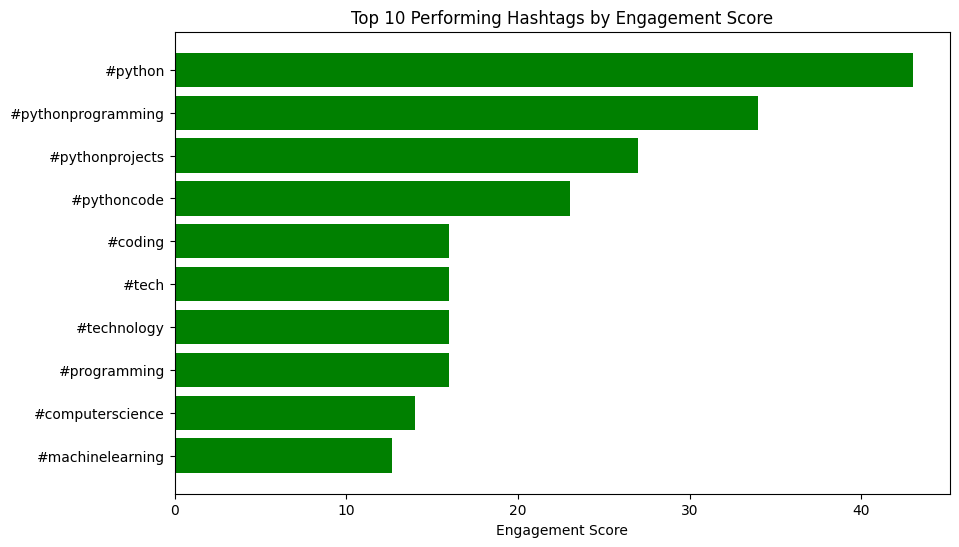

In [141]:
# Visualize the top 10 and bottom 10 hashtags by engagement score
plt.figure(figsize=(10, 6))
plt.barh(df_engagement_scores['Hashtag'].head(10), df_engagement_scores['Engagement Score'].head(10), color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Performing Hashtags by Engagement Score')
plt.xlabel('Engagement Score')
plt.show()

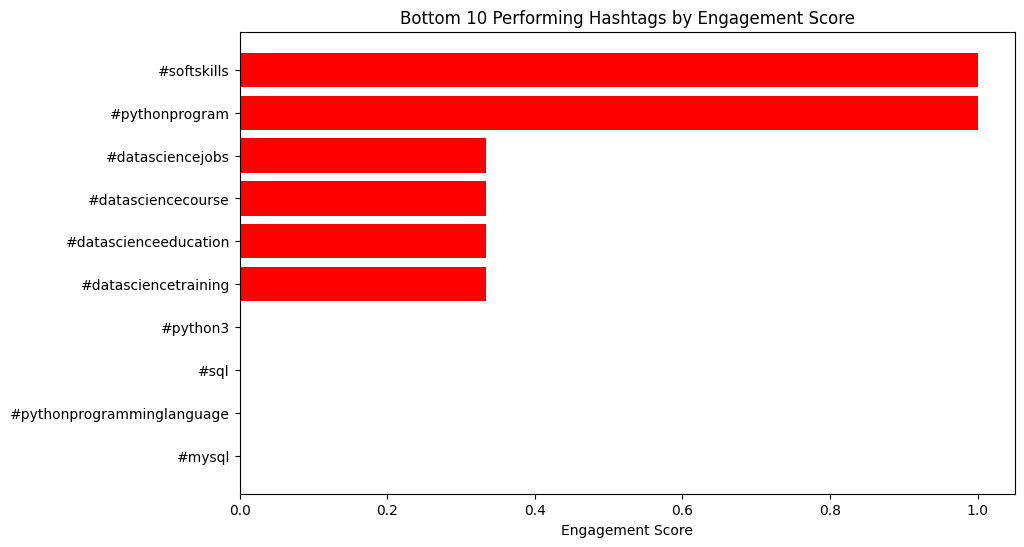

In [142]:
plt.figure(figsize=(10, 6))
plt.barh(df_engagement_scores['Hashtag'].tail(10), df_engagement_scores['Engagement Score'].tail(10), color='red')
plt.gca().invert_yaxis()
plt.title('Bottom 10 Performing Hashtags by Engagement Score')
plt.xlabel('Engagement Score')
plt.show()

## Hashtag Performance Analysis

We analyzed the performance of hashtags used in captions to determine which hashtags are associated with higher and lower engagement levels. The `Engagement Score` reflects the frequency and effectiveness of these hashtags in driving engagement.

### Top Performing Hashtags:
- **#python**: Engagement Score of **43.00**. This hashtag is highly effective in driving engagement.
- **#pythonprogramming**: Engagement Score of **34.00**. Another strong performer, suggesting a focus on Python programming attracts high engagement.
- **#pythonprojects**: Engagement Score of **27.00**. Indicates that posts about Python projects are highly engaging.
- **#pythoncode**: Engagement Score of **23.00**. Posts featuring Python code also show high engagement.
- **#coding**, **#tech**, **#technology**, **#programming**, and **#computerscience**: Each of these hashtags has an engagement score ranging from **16.00** to **14.00**, highlighting their relevance in engaging audiences interested in technology and programming topics.
- **#machinelearning**: Engagement Score of **12.67**, indicating a strong interest in machine learning content.

### Bottom Performing Hashtags:
- **#softskills**: Engagement Score of **1.00**. This hashtag shows minimal impact on engagement.
- **#pythonprogram**: Engagement Score of **1.00**, similar to **#softskills**, with low engagement.
- **#datasciencejobs**, **#datasciencecourse**, **#datascienceeducation**, and **#datasciencetraining**: These hashtags have low engagement scores ranging from **0.33** to **0.33**, suggesting they are less effective at driving engagement.
- **#python3**, **#sql**, **#pythonprogramminglanguage**, and **#mysql**: All have very low engagement scores, with **0.00** for some, indicating limited effectiveness in enhancing engagement.

### Implications for Content Strategy:
- **Top Hashtags**: Incorporate high-performing hashtags such as **#python**, **#pythonprogramming**, and **#pythonprojects** into your posts to maximize engagement.
- **Bottom Hashtags**: Be cautious about using hashtags with low engagement scores as they may not contribute significantly to your post's performance.

By focusing on high-performing hashtags and reevaluating the use of less effective ones, you can optimize your content strategy to better engage your audience.

## Analysis of Caption Keywords for Engagement

Now, we will analyze the performance of words in captions based on their association with high and low engagement levels. The goal is to identify which keywords are most indicative of high engagement, helping us to refine our content strategy. 

In [154]:
# Count the occurrences of each word in high and low engagement captions
high_caption_words = ' '.join(caption_high_engagement).split()
low_caption_words = ' '.join(caption_low_engagement).split()

high_caption_counts = Counter(high_caption_words)
low_caption_counts = Counter(low_caption_words)

# Calculate the Engagement Score for each word
def calculate_engagement_score(high, low):
    combined_words = set(high.keys()).union(set(low.keys()))
    engagement_scores = {}
    for word in combined_words:
        high_count = high.get(word, 0)
        low_count = low.get(word, 0)
        if low_count > 0:
            score = high_count / low_count
        else:
            score = high_count  # If low_count is 0, the score is just high_count
        engagement_scores[word] = score
    return engagement_scores

# Calculate the engagement scores
engagement_scores = calculate_engagement_score(high_caption_counts, low_caption_counts)

# Convert to DataFrame and sort
df_engagement_scores = pd.DataFrame(engagement_scores.items(), columns=['Word', 'Engagement Score'])
df_engagement_scores = df_engagement_scores.sort_values(by='Engagement Score', ascending=False)

# Display the top words by engagement score
print("Top Words by Engagement Score:")
print(df_engagement_scores.head(20))

Top Words by Engagement Score:
            Word  Engagement Score
109         data             22.33
51          time             18.00
138     analysis             14.00
15           try             13.00
37        series             12.00
100        ideas             11.00
121      project             11.00
131      science              9.67
20      learning              9.00
145         best              8.50
189        every              8.00
43         heres              8.00
17        python              7.00
63         learn              6.00
60          work              6.00
21         using              6.00
16    healthcare              6.00
204    scientist              6.00
92   programming              6.00
151      dataset              6.00


<Figure size 1200x600 with 0 Axes>

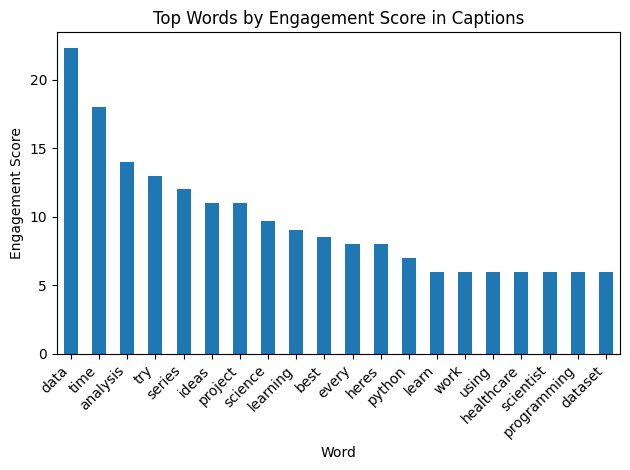

In [109]:
# Plotting the top words by engagement score
plt.figure(figsize=(12, 6))
df_engagement_scores.head(20).plot(kind='bar', x='Word', y='Engagement Score', legend=False)
plt.title('Top Words by Engagement Score in Captions')
plt.xlabel('Word')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Key Findings:

- **High Engagement Words:**
  - The top words with the highest engagement scores include **"data"**, **"time"**, **"analysis"**, **"try"**, and **"series"**. These words appear significantly more frequently in high engagement captions compared to low engagement ones.
  
- **Engagement Scores:**
  - For example, the word **"data"** has the highest engagement score of **22.33**, suggesting it is highly effective in driving engagement. Other notable words include **"time"** with an engagement score of **18.00**, and **"analysis"** with **14.00**.

- **Implications for Content Strategy:**
  - Words such as **"data"**, **"analysis"**, and **"science"** are performing exceptionally well in high engagement posts. Incorporating these terms into your captions may help enhance the engagement of your content.

This analysis provides valuable insights into which keywords are more likely to resonate with your audience and drive higher engagement. By focusing on these high-scoring words, you can refine your content strategy to achieve better results.
